# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns
from scipy import stats 
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from catboost import CatBoostClassifier 
from lightgbm import LGBMClassifier 
from sklearn.model_selection import GridSearchCV

# Loading source datasets

In [2]:
test=pd.read_csv("test_hXY9mYw.csv")

In [3]:
train=pd.read_csv("train_MpHjUjU.csv")

# Exploring shapes of source datasets

In [4]:
train.shape #shape of training data

(19104, 13)

In [5]:
test.shape #shape of test data

(741, 1)

In [6]:
train.columns #columns in training data

Index(['MMM-YY', 'Emp_ID', 'Age', 'Gender', 'City', 'Education_Level',
       'Salary', 'Dateofjoining', 'LastWorkingDate', 'Joining Designation',
       'Designation', 'Total Business Value', 'Quarterly Rating'],
      dtype='object')

In [7]:
test.columns #columns in test data

Index(['Emp_ID'], dtype='object')

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   MMM-YY                19104 non-null  object
 1   Emp_ID                19104 non-null  int64 
 2   Age                   19104 non-null  int64 
 3   Gender                19104 non-null  object
 4   City                  19104 non-null  object
 5   Education_Level       19104 non-null  object
 6   Salary                19104 non-null  int64 
 7   Dateofjoining         19104 non-null  object
 8   LastWorkingDate       1616 non-null   object
 9   Joining Designation   19104 non-null  int64 
 10  Designation           19104 non-null  int64 
 11  Total Business Value  19104 non-null  int64 
 12  Quarterly Rating      19104 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 1.9+ MB


# Data Cleaning

#Extracting attrition data using last working date

In [9]:
train['Attrition']=train['LastWorkingDate'].notnull() # attrition is true if there is a value in last working day

In [10]:
train.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,Attrition
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,2381060,2,False
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,-665480,2,False
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2,True
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1,False
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1,False


In [11]:
train['Attrition']=train['Attrition'].astype(int) #changing bool value to int as it will be easy for prediction

In [12]:
train.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,Attrition
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,2381060,2,0
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,-665480,2,0
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2,1
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1,0
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1,0


In [13]:
train['Attrition'].unique() #checking whether data as per expectations

array([0, 1])

In [14]:
train['Attrition'].value_counts()

0    17488
1     1616
Name: Attrition, dtype: int64

We can find 1616 employees already left the company.

In [15]:
train.columns

Index(['MMM-YY', 'Emp_ID', 'Age', 'Gender', 'City', 'Education_Level',
       'Salary', 'Dateofjoining', 'LastWorkingDate', 'Joining Designation',
       'Designation', 'Total Business Value', 'Quarterly Rating', 'Attrition'],
      dtype='object')

In [16]:
train=train.drop(['MMM-YY','Dateofjoining', 'LastWorkingDate'], axis = 1) #dropping date columns as it dont have any impact on predictionsg

In [17]:
train=train.groupby(['Emp_ID', 'Age', 'Gender', 'City', 'Education_Level','Salary', 'Joining Designation','Designation', 'Quarterly Rating'], as_index=False).agg({'Total Business Value': 'sum', 'Salary': 'last','Attrition':'sum'})

In [18]:
train=train.drop_duplicates(subset='Emp_ID') #dropping duplicates based on emp_id 

In [19]:
train.head()

,Emp_ID,Age,Gender,City,Education_Level,Joining Designation,Designation,Quarterly Rating,Total Business Value,Salary,Attrition
0,1,28,Male,C23,Master,1,1,2,1715580,57387,1
1,2,31,Male,C7,Master,2,2,1,0,67016,0
2,4,43,Male,C13,Master,2,2,1,350000,65603,1
3,5,29,Male,C9,College,1,1,1,120360,46368,1
4,6,31,Female,C11,Bachelor,3,3,1,0,78728,0


In [20]:
train.shape

(2381, 11)

# Exploratory data analysis 

In [21]:
train.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2381 entries, 0 to 5632
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Emp_ID                2381 non-null   int64 
 1   Age                   2381 non-null   int64 
 2   Gender                2381 non-null   object
 3   City                  2381 non-null   object
 4   Education_Level       2381 non-null   object
 5   Joining Designation   2381 non-null   int64 
 6   Designation           2381 non-null   int64 
 7   Quarterly Rating      2381 non-null   int64 
 8   Total Business Value  2381 non-null   int64 
 9   Salary                2381 non-null   int64 
 10  Attrition             2381 non-null   int32 
dtypes: int32(1), int64(7), object(3)
memory usage: 213.9+ KB


No null values found

In [22]:
#statistical Analysis
train.describe()

,Emp_ID,Age,Joining Designation,Designation,Quarterly Rating,Total Business Value,Salary,Attrition
count,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2.381000e+03,2381.000000,2381.000000
mean,1397.559009,33.090298,1.820244,2.078538,1.292314,7.344686e+05,59209.060899,0.388492
std,806.161628,5.840729,0.841433,0.931321,0.625961,1.907585e+06,28275.899087,0.487510
min,1.000000,21.000000,1.000000,1.000000,1.000000,-1.590270e+06,10747.000000,0.000000
25%,695.000000,29.000000,1.000000,1.000000,1.000000,0.000000e+00,39104.000000,0.000000
50%,1400.000000,33.000000,2.000000,2.000000,1.000000,1.170200e+05,55276.000000,0.000000
75%,2100.000000,37.000000,2.000000,3.000000,1.000000,5.992600e+05,75765.000000,1.000000
max,2788.000000,58.000000,5.000000,5.000000,4.000000,2.509483e+07,188418.000000,1.000000


# Univariate Analysis

In [23]:
sns.set_style("whitegrid")# setting plot style

In [24]:
sns.set_palette("viridis")#setting plot color palette

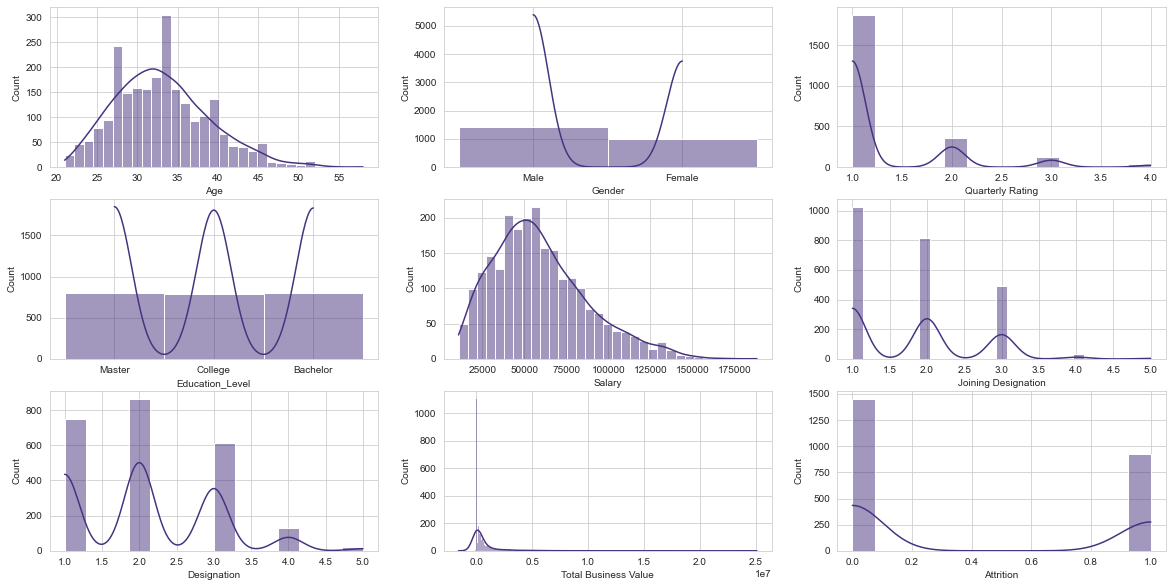

In [25]:
plt.figure(figsize=(20,10))
plt.subplot(3,3,1)
sns.histplot(train,x='Age',kde=True)
plt.subplot(3,3,2)
sns.histplot(train,x='Gender',kde=True )
plt.subplot(3,3,3)
sns.histplot(train,x='Quarterly Rating' ,kde=True )
plt.subplot(3,3,4)
sns.histplot(train,x='Education_Level' ,kde=True )
plt.subplot(3,3,5)
sns.histplot(train,x='Salary' ,kde=True )
plt.subplot(3,3,6)
sns.histplot(train,x='Joining Designation' ,kde=True )
plt.subplot(3,3,7)
sns.histplot(train,x='Designation' ,kde=True )
plt.subplot(3,3,8)
sns.histplot(train,x='Total Business Value' ,kde=True )
plt.subplot(3,3,9)
sns.histplot(train,x='Attrition' ,kde=True )
plt.show()

<AxesSubplot:xlabel='City', ylabel='Count'>

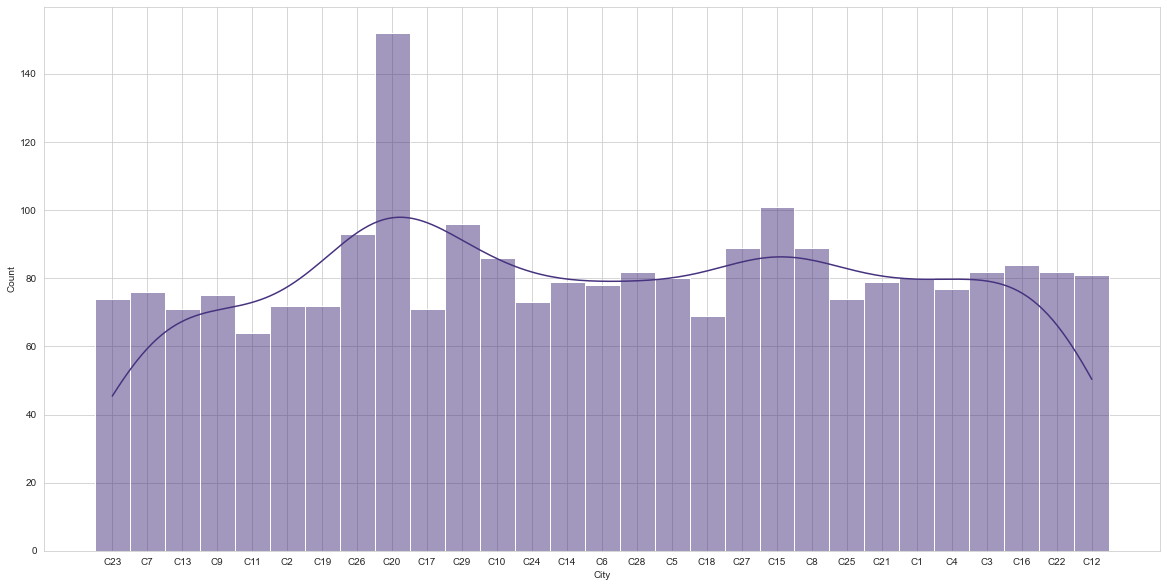

In [26]:
plt.figure(figsize=(20,10))
sns.histplot(train,x='City' ,kde=True )

# Conclusions on Univariate Analysis

1.Maximum no of employees are around range 33-35.

2.Maximum no of employees are Male.

3.Maximum no of employees are given rating 1 and minimum no of employees are given rating 4.

4.Equal no of employees in each educational degree category.

5.Maximum no of employees have 65000 as salary.

6.Maximum no of employees have joining designation as 1.

7.Maximum no of employees have designation as 2.

8.62% of employees have resigned.

9.Maximum no of employees are from c20

# Bivariate Analysis

In [27]:
sns.set_palette("tab10")#setting plot color palette

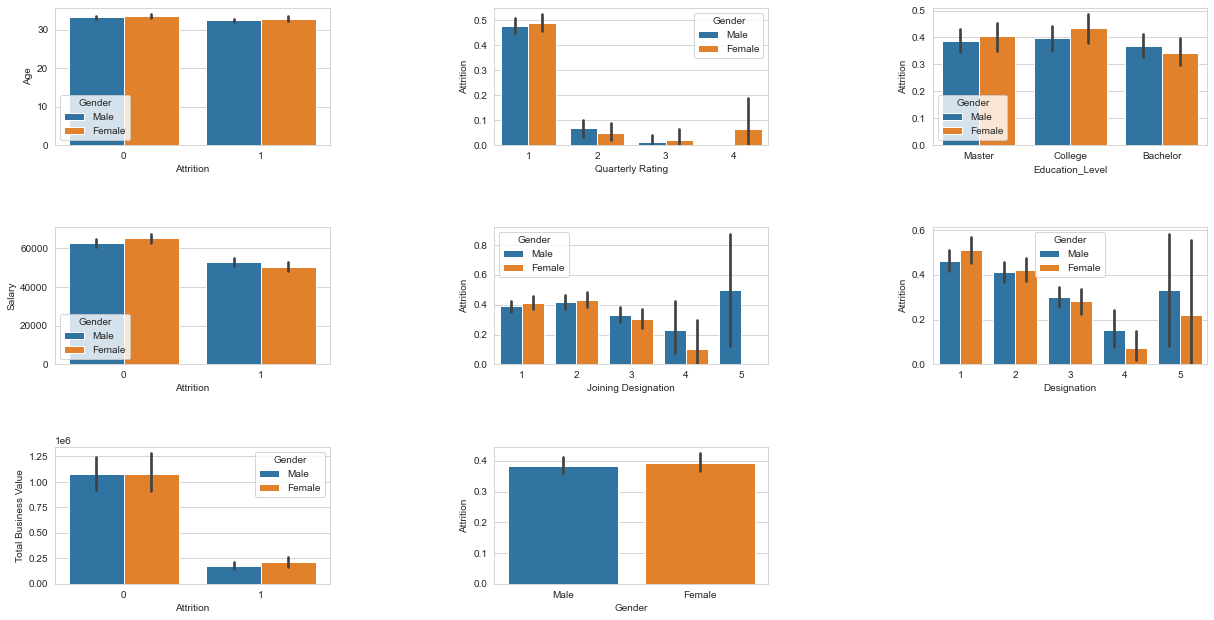

In [28]:
plt.figure(figsize=(20,10))
plt.subplot(3,3,1)
sns.barplot(data=train,x='Attrition',y='Age',hue='Gender')
plt.subplot(3,3,2)
sns.barplot(data=train,x='Quarterly Rating',y='Attrition',hue='Gender')
plt.subplot(3,3,3)
sns.barplot(data=train,x='Education_Level' ,y='Attrition',hue='Gender')
plt.subplot(3,3,4)
sns.barplot(data=train,x='Attrition' ,y='Salary',hue='Gender')
plt.subplot(3,3,5)
sns.barplot(data=train,x='Joining Designation' ,y='Attrition',hue='Gender')
plt.subplot(3,3,6)
sns.barplot(data=train,x='Designation' ,y='Attrition',hue='Gender')
plt.subplot(3,3,7)
sns.barplot(data=train,x='Attrition' ,y='Total Business Value',hue='Gender')
plt.subplot(3,3,8)
sns.barplot(data=train,x='Gender' ,y='Attrition')
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.6, 
                    hspace=0.6)
plt.show()

# Conclusions on Bi-variate analysis
    

1.Employees above age 30 tend to resign more.

2.Employees having quarter ratings 1 tend to resign more.

3.Female employees having college degree tend to resign more.

4.Employees having salary <60000 tend to resign more.

5.Male employees having joining designation as 5 tend to resign more.

6.Employees having designation as 1 tend to resign more.

7.Employees with total business value less than 0.2 tend to resign more.

8.Male employees tends to resign slightly more than female employees.

# Multivariant Analysis

In [29]:
train.corr()

,Emp_ID,Age,Joining Designation,Designation,Quarterly Rating,Total Business Value,Salary,Attrition
Emp_ID,1.000000,-0.008277,-0.023126,-0.011842,0.035576,-0.005011,-0.017310,0.012243
Age,-0.008277,1.000000,0.099742,0.224630,0.134938,0.143512,0.185630,-0.058807
Joining Designation,-0.023126,0.099742,1.000000,0.732204,-0.227265,-0.144571,0.484837,-0.059127
Designation,-0.011842,0.224630,0.732204,1.000000,0.024748,0.198717,0.738378,-0.191237
Quarterly Rating,0.035576,0.134938,-0.227265,0.024748,1.000000,0.647220,0.116997,-0.333740
Total Business Value,-0.005011,0.143512,-0.144571,0.198717,0.647220,1.000000,0.213804,-0.226414
Salary,-0.017310,0.185630,0.484837,0.738378,0.116997,0.213804,1.000000,-0.205573
Attrition,0.012243,-0.058807,-0.059127,-0.191237,-0.333740,-0.226414,-0.205573,1.000000


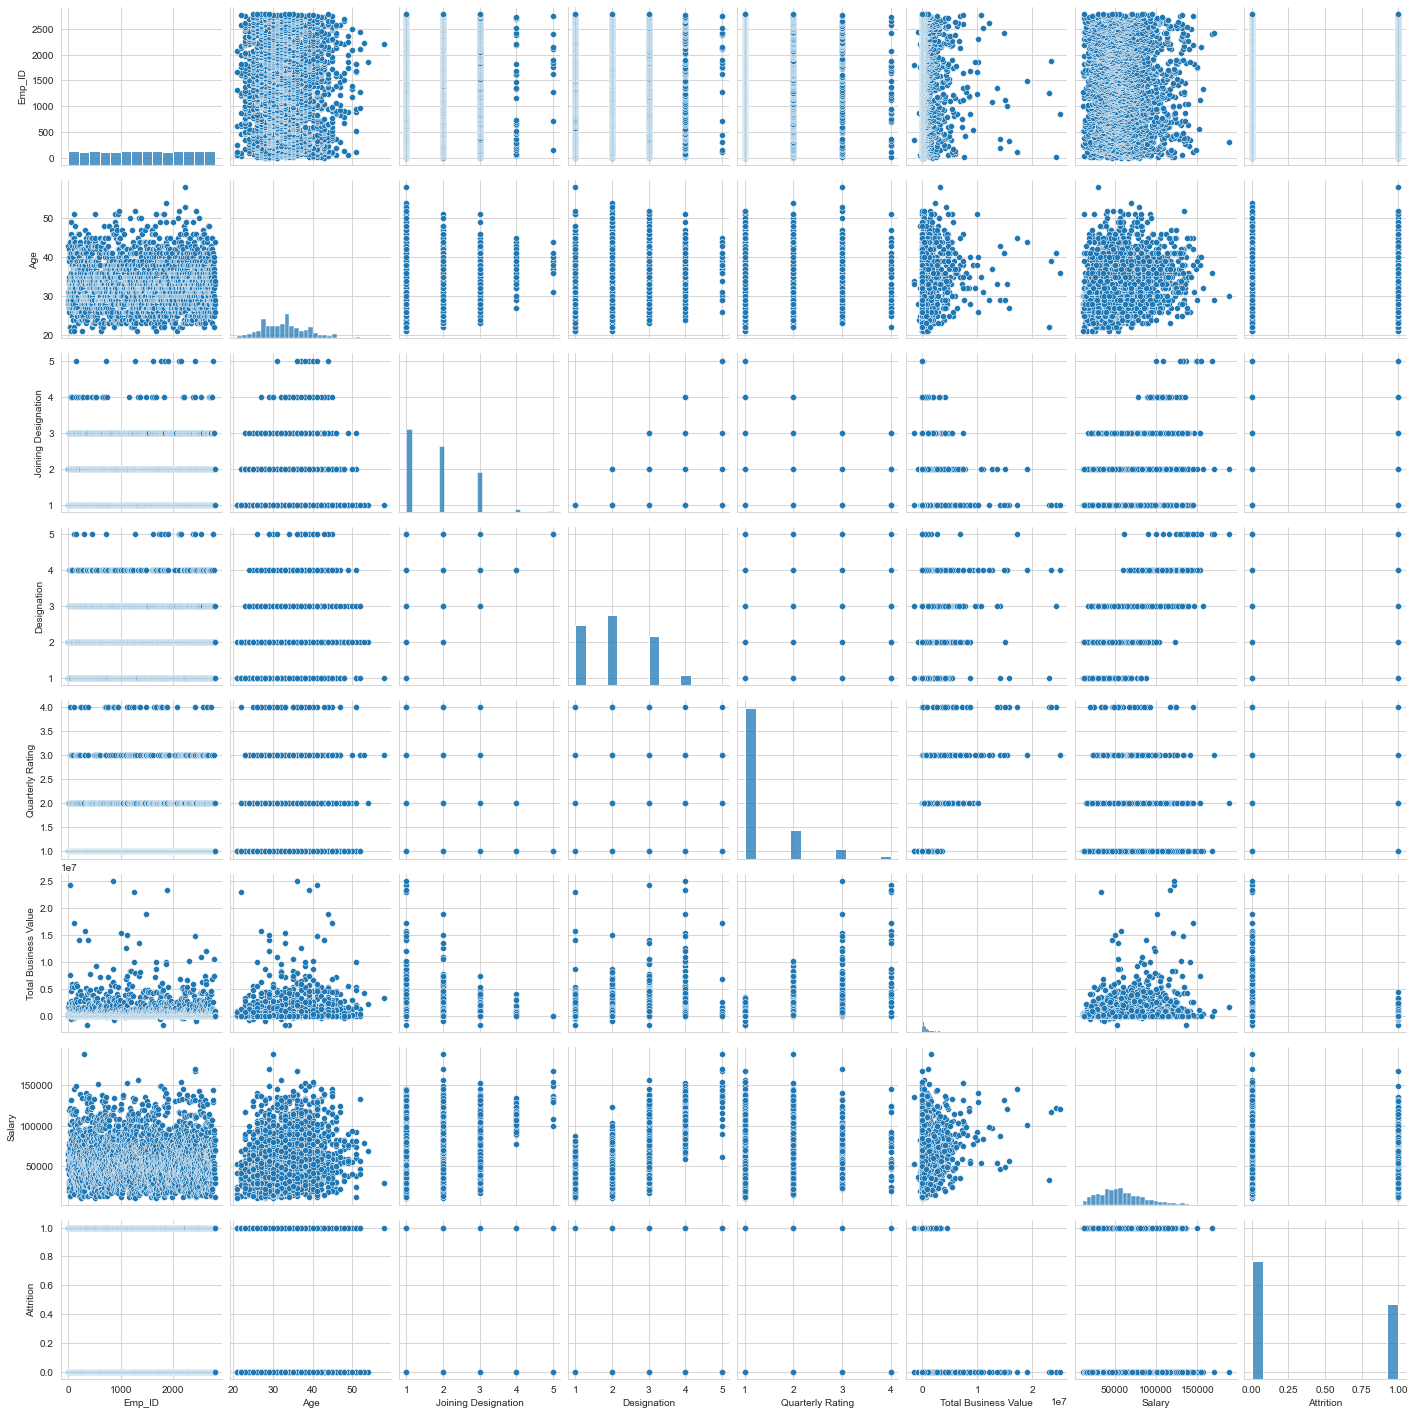

In [30]:
sns.pairplot(train)

<AxesSubplot:>

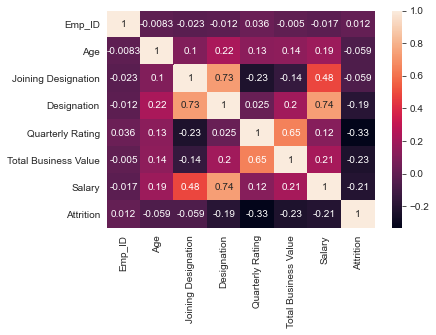

In [31]:
sns.heatmap(train.corr(), annot=True)  # plot the correlation coefficients as a heatmap

# Data Pre-processing

In [32]:
train.columns

Index(['Emp_ID', 'Age', 'Gender', 'City', 'Education_Level',
       'Joining Designation', 'Designation', 'Quarterly Rating',
       'Total Business Value', 'Salary', 'Attrition'],
      dtype='object')

In [33]:
df=train.iloc[:,1:]

In [34]:
df.columns

Index(['Age', 'Gender', 'City', 'Education_Level', 'Joining Designation',
       'Designation', 'Quarterly Rating', 'Total Business Value', 'Salary',
       'Attrition'],
      dtype='object')

In [35]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df['City'] = label.fit_transform(df['City'])
df['Gender'] = label.fit_transform(df['Gender'])
df['Education_Level'] = label.fit_transform(df['Education_Level'])


In [36]:
df.head(10)

,Age,Gender,City,Education_Level,Joining Designation,Designation,Quarterly Rating,Total Business Value,Salary,Attrition
0,28,1,15,2,1,1,2,1715580,57387,1
1,31,1,26,2,2,2,1,0,67016,0
2,43,1,4,2,2,2,1,350000,65603,1
3,29,1,28,1,1,1,1,120360,46368,1
4,31,0,2,0,3,3,1,0,78728,0
6,34,1,11,1,3,3,1,0,70656,1
7,28,0,10,2,1,1,1,0,42172,0
8,35,1,15,2,1,1,1,0,28116,1
10,29,1,10,2,1,4,1,2514920,119227,0
14,39,0,18,1,3,3,1,0,19734,0


In [37]:
#standardization of data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [38]:
df_std = pd.DataFrame(StandardScaler().fit_transform(df.iloc[:,:-1]))

In [39]:
df_std.head(5)

,0,1,2,3,4,5,6,7,8
0,-0.871701,0.834188,0.112195,1.217451,-0.975022,-1.158317,1.130796,0.514429,-0.064452
1,-0.357958,0.834188,1.445459,1.217451,0.213676,-0.084348,-0.467083,-0.385106,0.276157
2,1.697011,0.834188,-1.221068,1.217451,0.213676,-0.084348,-0.467083,-0.201590,0.226174
3,-0.700453,0.834188,1.687870,-0.003590,-0.975022,-1.158317,-0.467083,-0.321998,-0.454230
4,-0.357958,-1.198771,-1.463479,-1.224630,1.402374,0.989621,-0.467083,-0.385106,0.690448


In [40]:
df_std.columns=df.iloc[:,:-1].columns #transforming only continuous variable into single standard

In [41]:
df_std.head(5)

,Age,Gender,City,Education_Level,Joining Designation,Designation,Quarterly Rating,Total Business Value,Salary
0,-0.871701,0.834188,0.112195,1.217451,-0.975022,-1.158317,1.130796,0.514429,-0.064452
1,-0.357958,0.834188,1.445459,1.217451,0.213676,-0.084348,-0.467083,-0.385106,0.276157
2,1.697011,0.834188,-1.221068,1.217451,0.213676,-0.084348,-0.467083,-0.201590,0.226174
3,-0.700453,0.834188,1.687870,-0.003590,-0.975022,-1.158317,-0.467083,-0.321998,-0.454230
4,-0.357958,-1.198771,-1.463479,-1.224630,1.402374,0.989621,-0.467083,-0.385106,0.690448


In [42]:
X_train=df_std #Predictors

In [43]:
y_train=df['Attrition'] #Target

In [44]:
test_df=pd.merge(train,test,on='Emp_ID')

In [45]:

test_df['City'] = label.fit_transform(test_df['City'])
test_df['Gender'] = label.fit_transform(test_df['Gender'])
test_df['Education_Level'] = label.fit_transform(test_df['Education_Level'])

In [46]:
test=test_df.iloc[:,1:]

In [47]:
test=test.iloc[:,:-1]

In [48]:
test

,Age,Gender,City,Education_Level,Joining Designation,Designation,Quarterly Rating,Total Business Value,Salary
0,31,1,26,2,2,2,1,0,67016
1,31,0,2,0,3,3,1,0,78728
2,28,0,10,2,1,1,1,0,42172
3,39,0,18,1,3,3,1,0,19734
4,29,1,16,0,1,3,3,7621240,102077
...,...,...,...,...,...,...,...,...,...
736,27,1,28,1,3,3,1,0,85112
737,35,1,4,2,2,2,1,0,50180
738,25,1,15,2,2,2,1,715830,46952
739,33,1,16,1,2,3,1,971320,82815


In [49]:
test_std = pd.DataFrame(StandardScaler().fit_transform(test.iloc[:,:]))

In [50]:
t=test.iloc[:,:]

In [51]:
test_std.columns=t.columns

In [52]:
test_std

,Age,Gender,City,Education_Level,Joining Designation,Designation,Quarterly Rating,Total Business Value,Salary
0,-0.43962,0.827098,1.393081,1.235190,0.036084,-0.380471,-0.629419,-0.467069,-0.010603
1,-0.43962,-1.209047,-1.527413,-1.176604,1.198618,0.699716,-0.629419,-0.467069,0.390612
2,-0.97365,-1.209047,-0.553915,1.235190,-1.126449,-1.460657,-0.629419,-0.467069,-0.861677
3,0.98446,-1.209047,0.419583,0.029293,1.198618,0.699716,-0.629419,-0.467069,-1.630330
4,-0.79564,0.827098,0.176208,-1.176604,-1.126449,0.699716,2.005607,2.492058,1.190472
...,...,...,...,...,...,...,...,...,...
736,-1.15166,0.827098,1.636455,0.029293,1.198618,0.699716,-0.629419,-0.467069,0.609307
737,0.27242,0.827098,-1.284038,1.235190,0.036084,-0.380471,-0.629419,-0.467069,-0.587349
738,-1.50768,0.827098,0.054521,1.235190,0.036084,-0.380471,-0.629419,-0.189131,-0.697930
739,-0.08360,0.827098,0.176208,0.029293,0.036084,0.699716,-0.629419,-0.089931,0.530619


In [53]:
X_test=test_std

In [54]:
y_test=test_df['Attrition']

In [55]:
from imblearn.over_sampling import SMOTE

In [56]:
X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)

# Model

# 1:Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [58]:
logreg.fit(X_resampled, y_resampled)

LogisticRegression()

In [59]:
pred_val = logreg.predict(X_test)

In [60]:
from sklearn.metrics import f1_score

In [61]:
xg = xgb.XGBClassifier()
rfcl = RandomForestClassifier()
cb = CatBoostClassifier()
lg = LGBMClassifier ()


# Hyperparameter tuning

In [62]:
#ensemble_clf=[logreg,rfcl,xg,lg]

In [ ]:
#param1={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
#param2={"n_estimators":[100, 300, 500, 800, 1200],"max_depth":range(5,30,5),"min_samples_split":range(1,100,5),"min_samples_leaf":[1, 2, 5, 10]}
param3={'learning_rate':[0.1,0.01,0.03],'max_depth':range(5,10,2)}
#param4={'learning_rate': [0.03, 0.1,0.2,0.5],'depth':range(5,16,2),'l2_leaf_reg': range(1,20,2)}
#param5={'learning_rate': [0.03,0.5,0.1,0.01],'max_depth':range(5,20,5),'num_leaves': range(1,30,2)}

In [64]:
#param=[param1,param2,param4,param5]

In [65]:
model_log=["_cb"]

In [69]:
lg=CatBoostClassifier(max_depth=5,learning_rate=0.001)

In [70]:
lg.fit(X_resampled, y_resampled)

0:	learn: 0.6928508	total: 192ms	remaining: 3m 11s
1:	learn: 0.6925534	total: 198ms	remaining: 1m 38s
2:	learn: 0.6922772	total: 203ms	remaining: 1m 7s
3:	learn: 0.6919608	total: 209ms	remaining: 52.1s
4:	learn: 0.6917127	total: 215ms	remaining: 42.8s
5:	learn: 0.6914078	total: 221ms	remaining: 36.6s
6:	learn: 0.6911081	total: 226ms	remaining: 32.1s
7:	learn: 0.6907961	total: 230ms	remaining: 28.6s
8:	learn: 0.6904838	total: 235ms	remaining: 25.8s
9:	learn: 0.6901850	total: 240ms	remaining: 23.7s
10:	learn: 0.6898961	total: 244ms	remaining: 21.9s
11:	learn: 0.6896037	total: 248ms	remaining: 20.4s
12:	learn: 0.6893109	total: 251ms	remaining: 19.1s
13:	learn: 0.6890262	total: 254ms	remaining: 17.9s
14:	learn: 0.6887161	total: 257ms	remaining: 16.9s
15:	learn: 0.6884173	total: 261ms	remaining: 16s
16:	learn: 0.6881464	total: 265ms	remaining: 15.3s
17:	learn: 0.6878761	total: 269ms	remaining: 14.7s
18:	learn: 0.6875697	total: 271ms	remaining: 14s
19:	learn: 0.6872836	total: 275ms	remaining

218:	learn: 0.6423379	total: 709ms	remaining: 2.53s
219:	learn: 0.6421611	total: 711ms	remaining: 2.52s
220:	learn: 0.6419890	total: 712ms	remaining: 2.51s
221:	learn: 0.6418108	total: 715ms	remaining: 2.5s
222:	learn: 0.6416388	total: 717ms	remaining: 2.5s
223:	learn: 0.6414496	total: 718ms	remaining: 2.49s
224:	learn: 0.6412753	total: 720ms	remaining: 2.48s
225:	learn: 0.6410966	total: 722ms	remaining: 2.47s
226:	learn: 0.6409139	total: 724ms	remaining: 2.46s
227:	learn: 0.6407362	total: 726ms	remaining: 2.46s
228:	learn: 0.6405658	total: 729ms	remaining: 2.45s
229:	learn: 0.6403842	total: 730ms	remaining: 2.44s
230:	learn: 0.6401965	total: 733ms	remaining: 2.44s
231:	learn: 0.6400250	total: 735ms	remaining: 2.43s
232:	learn: 0.6398486	total: 737ms	remaining: 2.42s
233:	learn: 0.6396755	total: 738ms	remaining: 2.42s
234:	learn: 0.6394982	total: 740ms	remaining: 2.41s
235:	learn: 0.6393128	total: 742ms	remaining: 2.4s
236:	learn: 0.6391342	total: 744ms	remaining: 2.39s
237:	learn: 0.6

433:	learn: 0.6123982	total: 1.05s	remaining: 1.37s
434:	learn: 0.6122902	total: 1.05s	remaining: 1.37s
435:	learn: 0.6121887	total: 1.06s	remaining: 1.37s
436:	learn: 0.6120845	total: 1.06s	remaining: 1.36s
437:	learn: 0.6119711	total: 1.06s	remaining: 1.36s
438:	learn: 0.6118629	total: 1.06s	remaining: 1.36s
439:	learn: 0.6117611	total: 1.06s	remaining: 1.35s
440:	learn: 0.6116678	total: 1.06s	remaining: 1.35s
441:	learn: 0.6115373	total: 1.07s	remaining: 1.35s
442:	learn: 0.6114403	total: 1.07s	remaining: 1.34s
443:	learn: 0.6113449	total: 1.07s	remaining: 1.34s
444:	learn: 0.6112423	total: 1.07s	remaining: 1.34s
445:	learn: 0.6111484	total: 1.07s	remaining: 1.33s
446:	learn: 0.6110487	total: 1.07s	remaining: 1.33s
447:	learn: 0.6109521	total: 1.08s	remaining: 1.33s
448:	learn: 0.6108481	total: 1.08s	remaining: 1.32s
449:	learn: 0.6107491	total: 1.08s	remaining: 1.32s
450:	learn: 0.6106524	total: 1.08s	remaining: 1.32s
451:	learn: 0.6105718	total: 1.08s	remaining: 1.31s
452:	learn: 

650:	learn: 0.5939528	total: 1.4s	remaining: 749ms
651:	learn: 0.5938824	total: 1.4s	remaining: 747ms
652:	learn: 0.5937982	total: 1.4s	remaining: 744ms
653:	learn: 0.5937260	total: 1.4s	remaining: 742ms
654:	learn: 0.5936663	total: 1.4s	remaining: 739ms
655:	learn: 0.5936124	total: 1.41s	remaining: 737ms
656:	learn: 0.5935516	total: 1.41s	remaining: 735ms
657:	learn: 0.5935110	total: 1.41s	remaining: 732ms
658:	learn: 0.5934461	total: 1.41s	remaining: 730ms
659:	learn: 0.5933711	total: 1.41s	remaining: 727ms
660:	learn: 0.5933014	total: 1.41s	remaining: 725ms
661:	learn: 0.5932317	total: 1.42s	remaining: 723ms
662:	learn: 0.5931671	total: 1.42s	remaining: 720ms
663:	learn: 0.5931077	total: 1.42s	remaining: 718ms
664:	learn: 0.5930315	total: 1.42s	remaining: 716ms
665:	learn: 0.5929304	total: 1.42s	remaining: 714ms
666:	learn: 0.5928695	total: 1.42s	remaining: 711ms
667:	learn: 0.5927980	total: 1.43s	remaining: 709ms
668:	learn: 0.5927227	total: 1.43s	remaining: 706ms
669:	learn: 0.592

854:	learn: 0.5822192	total: 1.74s	remaining: 295ms
855:	learn: 0.5821725	total: 1.74s	remaining: 293ms
856:	learn: 0.5821348	total: 1.74s	remaining: 291ms
857:	learn: 0.5821028	total: 1.74s	remaining: 289ms
858:	learn: 0.5820505	total: 1.75s	remaining: 287ms
859:	learn: 0.5819981	total: 1.75s	remaining: 285ms
860:	learn: 0.5819582	total: 1.75s	remaining: 282ms
861:	learn: 0.5819142	total: 1.75s	remaining: 280ms
862:	learn: 0.5818402	total: 1.75s	remaining: 278ms
863:	learn: 0.5817865	total: 1.75s	remaining: 276ms
864:	learn: 0.5817322	total: 1.75s	remaining: 274ms
865:	learn: 0.5816774	total: 1.76s	remaining: 272ms
866:	learn: 0.5816366	total: 1.76s	remaining: 270ms
867:	learn: 0.5815902	total: 1.76s	remaining: 268ms
868:	learn: 0.5815439	total: 1.76s	remaining: 266ms
869:	learn: 0.5814618	total: 1.76s	remaining: 264ms
870:	learn: 0.5814177	total: 1.76s	remaining: 261ms
871:	learn: 0.5813616	total: 1.77s	remaining: 259ms
872:	learn: 0.5813138	total: 1.77s	remaining: 257ms
873:	learn: 

In [71]:
pred_val1 = lg.predict(X_test)

In [72]:
sub = pd.read_csv('sample_submission_znWiLZ4.csv')

In [73]:
sub

,Emp_ID,Target
0,394,0
1,173,0
2,1090,0
3,840,0
4,308,0
...,...,...
736,2134,0
737,2255,0
738,448,0
739,1644,0


In [74]:
sub['Emp_ID']=test_df['Emp_ID']

In [75]:
sub['Target']=pred_val1

In [76]:
sub

,Emp_ID,Target
0,2,1
1,6,1
2,11,1
3,14,1
4,25,0
...,...,...
736,2775,1
737,2778,1
738,2781,1
739,2784,0


In [77]:
sub.to_csv("submission.csv",index=False)